In [1]:
# Importing the basic libraries required for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns' , None)

In [2]:
# Reading the dataset

ind_rets = pd.read_csv('ind30_m_ew_rets.csv',index_col=0)/100
ind_nfirms = pd.read_csv('ind30_m_nfirms.csv',index_col=0)
ind_size = pd.read_csv('ind30_m_size.csv',index_col=0)

In [3]:
# To check head of any dataet

ind_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,20.05,48.56,27.47,110.78,47.55,41.30,27.74,40.52,92.79,81.22,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
192608,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,20.46,50.39,28.91,114.29,55.11,41.50,29.30,40.83,91.43,86.81,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
192609,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,21.41,51.21,29.34,116.69,57.11,42.17,29.45,41.18,94.86,85.01,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
192610,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,21.10,51.02,29.30,114.93,59.69,43.05,29.46,41.30,90.87,86.41,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
192611,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,20.12,48.90,29.60,108.33,54.81,40.44,28.51,41.90,89.87,83.92,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94


In [4]:
# To check tail f any dataset

ind_size.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
201808,11697.98,20738.70,82083.79,5614.41,1666.00,11188.09,9703.80,4891.61,7750.06,2307.51,2623.03,2680.64,5336.68,2481.67,5430.94,18966.46,5084.78,1210.73,10999.96,12256.65,17316.92,10961.79,11431.81,8167.26,10034.30,3392.45,15964.58,6806.11,7632.93,11015.79
201809,11624.31,20332.85,77629.48,5773.17,1587.92,11463.79,10199.85,5115.56,7726.66,2394.61,2631.98,2593.07,5226.15,2484.40,5329.32,18490.91,4521.91,1201.42,10701.21,12312.20,17816.83,11522.53,12631.96,8103.55,10292.17,3511.81,17387.93,7135.07,7834.57,11334.95
201810,11614.93,20256.16,80703.59,5816.00,1549.21,11579.42,10661.35,5228.28,6901.05,2241.00,2575.21,2568.97,5312.97,2507.46,5051.15,19682.79,4440.69,1136.76,11060.37,12208.24,18118.32,11540.36,12666.71,8064.22,10395.22,3476.28,17611.78,7312.36,7727.88,11453.54
201811,11721.21,21743.93,87079.79,4962.71,1444.47,11460.11,9579.97,4777.85,6113.67,1663.11,2234.54,2269.89,4620.04,2165.09,5081.59,17639.11,3979.34,1151.60,9795.53,12257.31,17934.51,10505.66,11635.87,7379.17,9513.99,3198.05,15917.02,7298.54,7217.76,10931.44
201812,11977.26,22983.02,79739.48,4927.55,1487.62,12189.64,9461.67,5090.94,6395.40,1711.16,2312.00,2200.71,4938.32,2265.13,5371.38,18365.00,3925.48,987.25,9585.56,12601.24,18378.40,10747.36,11060.40,7949.47,10146.79,3294.78,15889.42,7814.50,7431.81,11375.54


In [5]:
ind_rets.index = pd.to_datetime(ind_rets.index , format='%Y%m').to_period('M')
ind_nfirms.index = pd.to_datetime(ind_nfirms.index , format='%Y%m').to_period('M')
ind_size.index = pd.to_datetime(ind_size.index , format='%Y%m').to_period('M')

## Limits of Diversification
Why doesnt diversification help you in market crashes?

One reason is that correlations across assets increases as the market drops. Let's see if we can see this in the data.

Let's load up the industry data that we've used in the past.

# Implementing a Cap-Weighted Portfolio
Most market indices are constructed by taking a set of assets and weighting them by their market equity aka market capitalization.

Let's construct a market cap weighted index from our 30 industry portfolios.

For each of these industries, we also have data on the number of stocks in each industry as well as the average market cap in each industry. Thus, we can multiply the average market cap by the number of companies to get the total market capitalization of each industry. We can then weight each industry portfolio proportional to the market capitalization of that industry.

Let's load the industry size and average number of firms:

In [6]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,280.70,2185.20,521.93,1218.58,1854.45,536.90,388.36,324.16,3989.97,1705.62,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,286.44,2267.55,549.29,1257.19,2149.29,539.50,410.20,326.64,3931.49,1823.01,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,299.74,2304.45,557.46,1283.59,2227.29,548.21,412.30,329.44,3984.12,1785.21,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,295.40,2295.90,556.70,1264.23,2327.91,559.65,412.44,330.40,3816.54,1814.61,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,281.68,2200.50,562.40,1191.63,2137.59,525.72,399.14,335.20,3774.54,1762.32,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


Now we will calculate total market cap by summing up for all the industries

In [7]:
total_mktcap = ind_mktcap.sum(axis = 1)
total_mktcap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

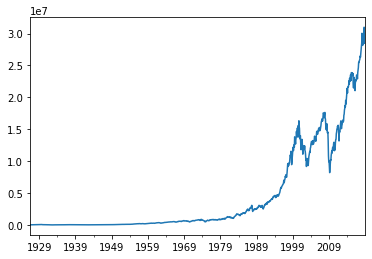

In [8]:
total_mktcap.plot()

Clearly, the market has grown over time. We can now compute the capweight of each industry as follows:

In [9]:
ind_capweight = ind_mktcap.divide(total_mktcap , axis = 0)
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,0.010530,0.081972,0.019579,0.045712,0.069565,0.020140,0.014568,0.012160,0.149673,0.063982,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,0.010440,0.082648,0.020021,0.045822,0.078337,0.019664,0.014951,0.011905,0.143295,0.066445,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,0.010682,0.082125,0.019866,0.045744,0.079375,0.019537,0.014693,0.011740,0.141984,0.063620,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,0.010528,0.081829,0.019842,0.045059,0.082970,0.019947,0.014700,0.011776,0.136027,0.064675,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,0.010356,0.080905,0.020678,0.043813,0.078592,0.019329,0.014675,0.012324,0.138778,0.064795,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [10]:
ind_capweight.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

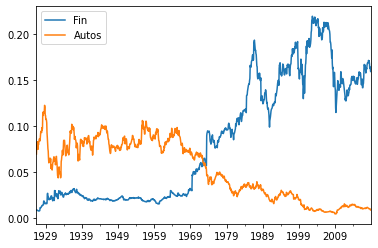

In [11]:
ind_capweight[['Fin  ' , 'Autos']].plot()

# Constructing a Cap Weighted Market Index
One way to construct a market index is to build a portfolio whose weights are rebalanced back to the target weights every period. In reality, the weights may drift over time but this simplification is close enough.

In [12]:
total_mkt_return = (ind_capweight * ind_rets).sum(axis =1)
total_mkt_return.tail()

2018-08    0.038469
2018-09   -0.015769
2018-10   -0.095264
2018-11   -0.005215
2018-12   -0.126706
Freq: M, dtype: float64

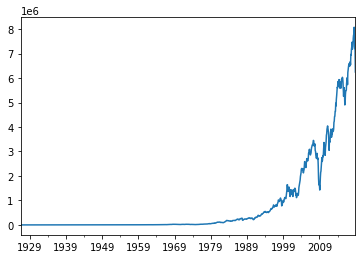

In [13]:
total_mkt_weight_index = 100 * (1+total_mkt_return).cumprod()
total_mkt_weight_index.plot()
plt.show()

# Rolling Windows
Let's construct a rolling window of returns over a trailing 36 month period. Pandas contains direct support for rolling windows, and allows you to aggregate the returns over a window. In our case, lets compute the average return over a trailing 36 month window.

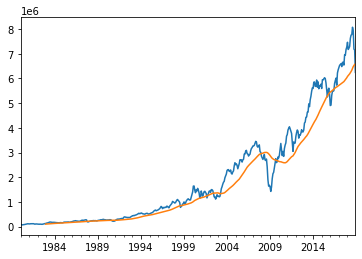

In [14]:
total_mkt_weight_index['1980':].plot()
total_mkt_weight_index['1980':].rolling(window=36).mean().plot()

We dont really want the mean return, we want to look at the trailing 3 year compounded return. We need to apply our own function, instead of mean().

Each time the window is advanced, a new DataFrame (with just the slice of the DataFrame in the window) is used to generate a new value. You can either use one of the built-in DataFrame methods like .mean or you can use the .aggregate method to apply your own function to each column for all the rows that fall in that window.

Let's create a time series of the annualized returns over the trailing 36 months and the average correlation across stocks over that same 36 months.

In [15]:
def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

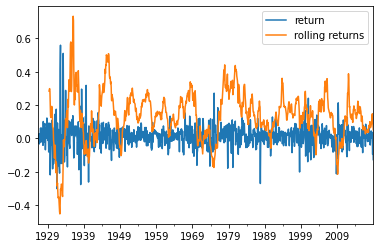

In [16]:
tr36_returns = total_mkt_return.rolling(window = 36).aggregate(annualize_rets , periods_per_year = 12)
total_mkt_return.plot(label='return')
tr36_returns.plot(label = 'rolling returns')
plt.legend()
plt.show()

In [17]:
total_mkt_corr = ind_rets.rolling(36).corr()
total_mkt_corr.index.names = ['date' , 'firms']
total_mkt_corr.tail(41)

Food      Beer      Smoke     Games     Books     Hshld  \
date    firms                                                               
2018-11 Util   0.075820  0.224415 -0.118164  0.163013  0.165360  0.077030   
        Telcm  0.537491  0.317198  0.072660  0.526431  0.556437  0.513596   
        Servs  0.466813  0.344072 -0.122712  0.866665  0.725202  0.645164   
        BusEq  0.459971  0.362256 -0.140213  0.849848  0.655998  0.716374   
        Paper  0.603176  0.310880  0.004644  0.832024  0.740948  0.712380   
        Trans  0.365054  0.010708 -0.075945  0.707145  0.681964  0.597180   
        Whlsl  0.515396  0.304695  0.028068  0.792036  0.751336  0.689376   
        Rtail  0.659308  0.312026 -0.013059  0.777357  0.635916  0.678434   
        Meals  0.454745  0.259754  0.005060  0.652992  0.588083  0.411649   
        Fin    0.337724  0.184344 -0.253843  0.692177  0.758191  0.612240   
        Other  0.530627  0.457852  0.033809  0.801828  0.669364  0.661443   
2018-12 Food   1.000000  0.612953  0.416819  0.641396  0.633425  0.665683   
        Beer   0.612953  1.000000  0.374997  0.499059  0.524195  0.416261   
        Smoke  0.416819  0.374997  1.000000  0.148795  0.012004  0.032500   
        Games  0.641396  0.499059  0.148795  1.000000  0.709353  0.752687   
        Books  0.633425  0.524195  0.012004  0.709353  1.000000  0.673722   
        Hshld  0.665683  0.416261  0.032500  0.752687  0.673722  1.000000   
        Clths  0.614108  0.386706  0.271528  0.586025  0.579624  0.571522   
        Hlth   0.491454  0.369607  0.037642  0.826304  0.685488  0.693834   
        Chems  0.510723  0.473957  0.067455  0.767285  0.745681  0.734955   
        Txtls  0.610075  0.507210 -0.027820  0.717904  0.735549  0.790427   
        Cnstr  0.568010  0.465019  0.104486  0.828715  0.799165  0.721071   
        Steel  0.494535  0.190889  0.110515  0.676373  0.644192  0.603764   
        FabPr  0.538890  0.466561  0.161309  0.781645  0.780253  0.739160   
        ElcEq  0.555779  0.472994  0.032944  0.795182  0.762499  0.736705   
        Autos  0.491935  0.439143  0.078014  0.776295  0.710349  0.744642   
        Carry  0.498529  0.369115  0.238301  0.730687  0.677172  0.608473   
        Mines  0.464838  0.181137  0.114248  0.400728  0.507078  0.378017   
        Coal   0.411992  0.171479  0.175895  0.403087  0.455269  0.250499   
        Oil    0.496126  0.393049  0.203135  0.697190  0.702855  0.569086   
        Util   0.241066  0.351243  0.027451  0.270939  0.279323  0.218218   
        Telcm  0.690087  0.536874  0.286529  0.627953  0.654090  0.643279   
        Servs  0.586680  0.532632  0.061925  0.893960  0.763562  0.709408   
        BusEq  0.595518  0.530121  0.070049  0.876938  0.723826  0.776555   
        Paper  0.695481  0.493205  0.180895  0.862321  0.786226  0.768857   
        Trans  0.523743  0.256142  0.117470  0.761305  0.734042  0.679256   
        Whlsl  0.616270  0.494486  0.182592  0.828794  0.782145  0.740774   
        Rtail  0.737708  0.465608  0.170350  0.819260  0.718729  0.749598   
        Meals  0.589524  0.437456  0.186983  0.715878  0.670806  0.538141   
        Fin    0.502855  0.384944 -0.027428  0.747228  0.804589  0.692634   
        Other  0.633037  0.574111  0.197281  0.838277  0.745089  0.731392   

                  Clths     Hlth      Chems     Txtls     Cnstr     Steel  \
date    firms                                                               
2018-11 Util   0.110603 -0.040737  0.183006  0.206628  0.261893  0.039887   
        Telcm  0.434802  0.502606  0.447968  0.444844  0.498360  0.526054   
        Servs  0.423778  0.841347  0.761372  0.706392  0.789891  0.626239   
        BusEq  0.468174  0.798941  0.781109  0.758446  0.807894  0.655268   
        Paper  0.418889  0.699136  0.825886  0.791343  0.897177  0.731064   
        Trans  0.527975  0.668801  0.767378  0.615932  0.848499  0.868944   
        Whlsl  0.519563  0.708921  0.859642  0.685977  0.889015  0.804054   
        Rtail

In [18]:
tr36_corr = total_mkt_corr.groupby('date').apply(lambda cor : cor.values.mean())

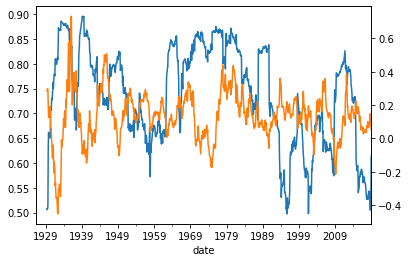

In [19]:
tr36_corr.plot()
tr36_returns.plot(secondary_y = True)

# Implementing Portfolio Insurance (CPPI) and Drawdown Constraints

In [20]:
risky_asset = ind_rets['2000':][['Steel' , 'Fin  ' , 'Beer ']]
safe_asset = pd.DataFrame().reindex_like(risky_asset)
safe_asset.values[:] = 0.03 / 12  # Assuming safe asset gives 3 percent returns per annum
wealth = 1000
floor = 0.80      # Set the floor to 80 percent

Now, we need to backtest this strategy by starting at the beginning and at every point in time:

1.Compute the cushion (asset value minus floor)

2.Compute the allocation (based on the multiplier)

3.Compute the new asset value

Although we rarely use for-loops in working with time-series, relying instead of Pandas and Numpy to do the looping internally (and efficiently) this is easier to do with a traditional for-loop.

In [21]:
n_steps = len(risky_asset.index)
account_value = wealth
floor_value = account_value*floor
m = 3

account_history = pd.DataFrame().reindex_like(risky_asset)
risky_wealth_history = pd.DataFrame().reindex_like(risky_asset)
cushion_history = pd.DataFrame().reindex_like(risky_asset) 

for i in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_wealth = m * cushion
    risky_wealth = np.minimum(risky_wealth , 1)
    risky_wealth = np.maximum(risky_wealth , 0)
    safe_wealth = 1 - risky_wealth
    risky_rupees =  risky_wealth * account_value
    safe_rupees = safe_wealth * account_value
    account_value = (risky_rupees * (1+risky_asset.iloc[i])) + (safe_rupees * (1+safe_asset).iloc[i])
    account_history.iloc[i] = account_value
   # risky_wealth_history.loc[i] = risky_wealth
   # cushion_history.loc[i] = cushion
    risky_index = wealth * (1+risky_asset).cumprod()

In [22]:
account_history.head()

,Steel,Fin,Beer
2000-01,990.140000,986.360000,1022.120000
2000-02,1001.685028,979.601080,1012.214368
2000-03,1012.660012,990.617054,1019.010413
2000-04,997.711009,981.485018,1021.689345
2000-05,962.719279,983.557612,1038.076983


In [23]:
risky_index.head()

,Steel,Fin,Beer
2000-01,981.900000,975.600000,1035.200000
2000-02,999.966960,961.941600,1018.429760
2000-03,1016.466415,979.641325,1027.799314
2000-04,991.156401,962.203710,1030.574372
2000-05,930.993208,963.935677,1054.586755


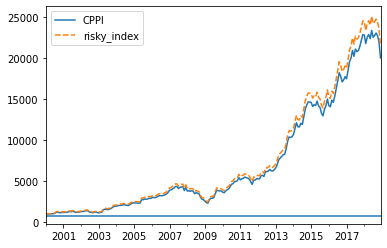

In [24]:
ax = account_history['Beer '].plot(label = 'CPPI')
risky_index['Beer '].plot(linestyle = '--' , label = 'risky_index')
plt.legend()
ax.axhline(y = floor_value)

# Random Walk Generation

Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion process:

𝑆𝑡+𝑑𝑡−𝑆𝑡𝑆𝑡=𝜇𝑑𝑡+𝜎𝑑𝑡⎯⎯⎯√𝜉𝑡
 
When we generate simulated returns, we can usually ignore the decomposition of  𝜇  since we only care about the net effective drift term without worrying about what the components of it are.

The implementation is really very close to the equation above, although it can be optimized in many ways, this is the most direct translation of the equation:

In [1]:
import numpy as np
import pandas as pd

def gbm(n_years = 20 , stocks = 3 , mu = 0.07 , sigma = 0.15 , steps_per_year = 12 , init = 100 ):
    dt = 1 / steps_per_year
    n_size = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_size , stocks))
    rets = (mu * dt) + (sigma * np.sqrt(dt) * xi)
    rets = pd.DataFrame (rets)
    price = init * (1 + rets).cumprod()
    return price

In [24]:
a = gbm(n_years = 20 , stocks=5)
a.head()

,0,1,2,3,4
0,101.724107,98.353789,104.686172,97.587853,107.578266
1,97.775553,92.972149,104.665353,102.522469,106.166777
2,99.224634,98.805242,110.453258,94.862569,101.939903
3,100.343338,89.027196,110.037766,95.153676,90.418058
4,100.531024,89.066061,117.668060,87.967378,89.513042


In [25]:
import ipywidgets as widgets

In [28]:
def show_gbm (n_years , stocks  , mu  , sigma ):
    prices = gbm(n_years = n_years , stocks=stocks , mu = mu , sigma = sigma)
    ax = prices.plot(legend = False)
    ax.axhline(100)

In [37]:
gbm_control = widgets.interactive(show_gbm , n_years = (5,50) , stocks = widgets.IntSlider(min=1,max=500,step=5,value=5) , mu = widgets.IntSlider(0 ,1 ,.1) , sigma=(0,+.2,.1))
gbm_control

interactive(children=(IntSlider(value=27, description='n_years', max=50, min=5), IntSlider(value=5, descriptio…